"Wisconsin Meme Kanseri" verisetini kullanarak Göğüs Kanseri Tahminleme 

In [1]:
# Gerekli kütüphaneleri yükleyelim.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
# sklearn kütüphanesindeki "Wisconsin Meme Kanseri" verisetini yükleyelim.
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

print(breast_cancer_dataset)

#'malignant' : kötü huylu
#'benign' : iyi huylu

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
import sklearn.datasets as datasets

# Breast Cancer verisini yükle
data = datasets.load_breast_cancer()

# Hedef değişkenin etiketlerini kontrol edelim
print(data.target_names)  # ['malignant' 'benign']
print(set(data.target))   # {0, 1}

['malignant' 'benign']
{0, 1}


**0 : 'malignant' - Kötü huylu**

**1 : 'benign' - İyi huylu**

In [4]:
# verileri veriçerçevesine yükleyelim.
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

# ilk 5 gözleme bakalım.
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* mean radius → Ortalama yarıçap

* mean texture → Ortalama doku

* mean perimeter → Ortalama çevre

* mean area → Ortalama alan

* mean smoothness → Ortalama pürüzsüzlük

* mean compactness → Ortalama sıkışıklık

* mean concavity → Ortalama çöküntü

* mean concave points → Ortalama içbükey noktalar

* mean symmetry → Ortalama simetri

* mean fractal dimension → Ortalama fraktal boyut

* worst radius → En kötü yarıçap

* worst texture → En kötü doku

* worst perimeter → En kötü çevre

* worst area → En kötü alan

* worst smoothness → En kötü pürüzsüzlük

* worst compactness → En kötü sıkışıklık

* worst concavity → En kötü çöküntü

* worst concave points → En kötü içbükey noktalar

* worst symmetry → En kötü simetri

* worst fractal dimension → En kötü fraktal boyut

In [5]:
# 'hedef' sütununu veri çerçevesine ekleme
data_frame['label'] = breast_cancer_dataset.target

# veri çerçevesinin son 5 satırını yazdıralım
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
# veri kümesindeki 569 satır ve 31 sütun var
data_frame.shape

(569, 31)

In [7]:
# Sütunların veri türleri hakkında
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# Eksik veri kontrolü

data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [9]:
# verilerin istatistiksel özelliklerine bakalım.
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
# Hedef Değişkenin dağılımını kontrol edelim
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

**212 adet 'malignant'** (Kötü huylu / Kanserli hücre)

**357 adet 'benign'** (İyi huylu / Kanserli olmayan hücre)

In [11]:
# hangi özelliklerin kanserli ve kansersiz hücrelerde farklılaştığını görelim.
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [12]:
#'label' sütunu hariç tüm özellikleri X değişkenine kaydedelim.
X = data_frame.drop(columns='label', axis=1)

#'label' sütununu Y değişkenine kaydedelim.
Y = data_frame['label']

# x veri çerçevesinden gelen özellikleri kullanarak Y veri çerçevesinden
#gelen değerleri tahmin edeceğiz.

**X - Girdi (Bağımsız değişkenler - özellikler)**

**Y - Çıktı (Bağımlı değişken - kanser olup olmadığı)**

In [13]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [14]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


**Veri setini %80 eğitim ve %20 test olarak ayıralım.**

Model önce X_train ve Y_train kullanılarak eğitilir, sonra X_test ile tahmin yapıp Y_test ile doğruluk ölçelim. 

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Veri setindeki özellikleri ölçeklendirelim (standartlaştırmak) 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**TensorFlow kütüphanesini kullanarak yapay sinir ağı modelleri oluşturalım.**

* tf.random.set_seed(3)-Rastgelelik kontrol ediliyor, böylece modelin her çalıştırıldığında aynı sonuçları üretmesi sağlanacak (tekrarlanabilirlik için).

* from tensorflow import keras → TensorFlow içindeki Keras API’si içe aktarılıyor. Keras, sinir ağı modelleri oluşturmak için kullanılacak.

* Rastgele tohum (set_seed(3)) kullanılması, modelin her çalıştırıldığında aynı başlangıç değerleriyle eğitilmesini sağlanıcak.

In [17]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

Keras API'sini kullanarak Sequential modelinde katmanlar ekleniyor. Her katman sırasıyla önceki katmandan gelen verileri işleyecek..

Giriş katmanı. Burada, 30 boyutlu bir veri girişi bekleniyor ve bu veriyi tek boyutlu (1D) hale getirir.

Gizli katman. 20 nörondan oluşur ve ReLU aktivasyon fonksiyonu kullanılır.
Bu katman, giriş verisini işler ve çıktısını bir sonraki katmana gönderir.

Çıkış katmanı. 2 nöronlu ve sigmoid aktivasyon fonksiyonu kullanır.
Bu katman, modelin çift sınıflı (binary classification) çıktılarını üretir.
Sigmoid, çıktıyı 0 ile 1 arasında bir olasılık değeri olarak verir.

Bu modelde, giriş olarak 30 özellikli bir veri alınıp önce gizli katmandan geçirilir, sonra iki sınıf arasındaki olasılıkları tahmin etmek için çıkış katmanına iletilir.

In [18]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)), #Input layer/ Giriş katmanı, 
                          keras.layers.Dense(20, activation='relu'), # Hidden Layer / Gizli Katman
                          keras.layers.Dense(2, activation='sigmoid') # Output layer /Çıkış katmanı

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimizasyon algoritması olarak **Adam algoritması** kullanıldı. Genellikle hızlı ve verimli bir öğrenme süreci sağlar.

Kaybın (loss) hesaplanma yöntemidir. Burada sparse **categorical crossentropy kayıp fonksiyonu** seçildi.
Bu fonksiyon, özellikle çok sınıflı sınıflandırma (multi-class classification) problemleri için kullanılır. Etiketlerin tamsayı formatında olduğu durumlarda tercih edilir (yani 0, 1, 2 şeklinde).

Modelin performansını ölçmek için kullanılan metrik olarak doğruluk (accuracy) seçilmiştir.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

validation_split=0.1: Eğitim verisinin %10'unu doğrulama verisi olarak ayırır. Eğitim sırasında doğrulama verisi, modelin genelleme performansını izlemek için kullanılır

history: Modelin eğitim sürecindeki kayıp (loss) ve doğruluk (accuracy) gibi bilgilerini içeren bir nesne. Bu nesne, modelin nasıl ilerlediğini izlemek için kullanılabilir.

In [20]:
#Modelin eğitimini başlatalım.Verilerin %10'unu doğrulama için ayırarak 10 epoch boyunca eğitim yapılır 
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.7903 - loss: 0.4996 - val_accuracy: 0.9130 - val_loss: 0.3111
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.3565 - val_accuracy: 0.9348 - val_loss: 0.2302
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9081 - loss: 0.2735 - val_accuracy: 0.9565 - val_loss: 0.1825
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2219 - val_accuracy: 0.9565 - val_loss: 0.1534
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1872 - val_accuracy: 0.9565 - val_loss: 0.1342
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9502 - loss: 0.1627 - val_accuracy: 0.9565 - val_loss: 0.1205
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.1446 - val_accuracy: 0.9565 - val_loss: 0.1104
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.1309 - val_accuracy: 0.9565 - val_los

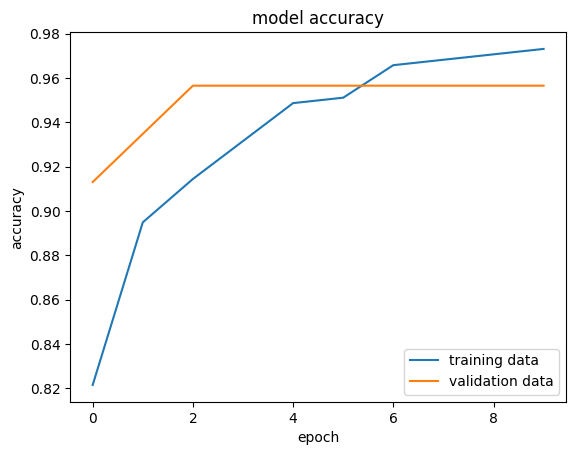

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')


**Training ve validation doğruluk oranlarının birbirine yakın olması, modelin iyi bir genel performans gösterdiğini ve overfitting (aşırı öğrenme) riskinin düşük olduğunu gösterir.Ancak, validation doğruluğunun eğitim doğruluğundan biraz daha yüksek olması, modelin doğrulama verisine daha iyi uyum sağladığını gösterebilir.**


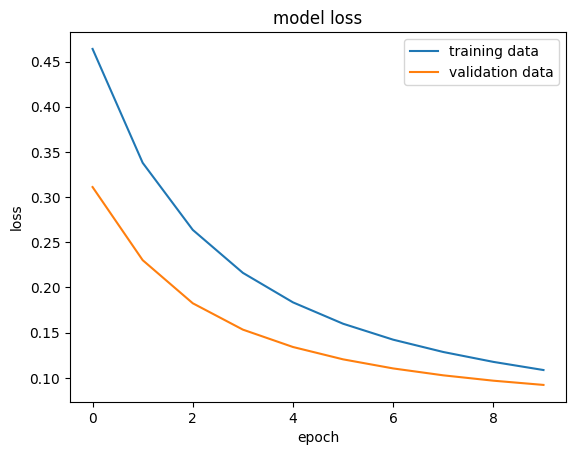

In [22]:
# Doğrulama verilerinin ve eğitim verilerinin her tekrara karşı kayıp fonksiyonu için çizim yapılması
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [23]:
print(X_test_std.shape)
print(X_test_std[0])

#test verisi 114 örnek (satır) ve 30 özellik (sütun) içeriyor
#Yani, test verisinde 114 örnek bulunuyor ve her bir örnekte 30 farklı özellik 
#(özellik vektörleri) yer alıyor.

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [24]:
#Test verisi üzerinden modelin tahminlerini alır ve bu tahminleri Y_pred değişkeninde
#saklar.
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [25]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.6020357 0.6089834]


In [26]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [27]:
# Bu bize değerin 0 ve 1 olma olasılığını verecektir
print(Y_pred)

[[6.0203570e-01 6.0898340e-01]
 [3.6247581e-01 4.3473712e-01]
 [1.9438952e-02 9.5631677e-01]
 [9.9385577e-01 3.5981674e-04]
 [4.8153564e-01 5.0715548e-01]
 [8.9998507e-01 7.3221265e-03]
 [1.9961162e-01 7.5965005e-01]
 [3.6423929e-02 8.6389047e-01]
 [1.1406346e-01 8.0110013e-01]
 [9.2979297e-02 8.2974088e-01]
 [3.1336913e-01 4.3383893e-01]
 [1.0452416e-01 8.2809681e-01]
 [2.7142459e-01 8.2155645e-01]
 [2.6163608e-01 6.4782542e-01]
 [5.1587954e-02 8.8463557e-01]
 [8.8444901e-01 8.4048726e-02]
 [3.4523919e-02 9.3979424e-01]
 [3.0632544e-02 8.9741039e-01]
 [6.4377867e-02 8.4146488e-01]
 [8.2054752e-01 2.5868148e-02]
 [7.1032786e-01 9.4187576e-01]
 [2.8017018e-02 9.1278237e-01]
 [8.5196659e-02 9.2416906e-01]
 [2.1803163e-02 8.8845205e-01]
 [1.2119321e-01 6.6353613e-01]
 [7.8718930e-01 5.4504823e-02]
 [1.6693160e-01 7.2449744e-01]
 [3.3022183e-01 5.1573741e-01]
 [8.2843643e-01 7.7727258e-02]
 [7.8377473e-01 4.8724309e-02]
 [1.0175649e-01 7.1086287e-01]
 [1.3600342e-01 8.1103736e-01]
 [3.6277

In [28]:
my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [29]:
# Y_pred_labels, tüm tahminlerin sınıf indekslerinden oluşan bir liste haline gelir.

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [30]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
#Burada, kanserli tümör verisinin 31 farklı özelliği (örneğin, "radius", "perimeter",
#"area" gibi özellikler) input_data adlı bir tuple olarak tanımlandı.
#sıralama verinin doğru işlenebilmesi için önemli.

#input_data'nın numpy dizisine dönüştürülmesi sağlanıyor.
#Numpy dizisi, verilerin sayısal bir biçimde işlenebilmesini sağlar.
input_data_as_numpy_array = np.asarray(input_data)

# numpy dizisini bir veri noktası için tahmin ettiğimiz şekilde yeniden şekillendirelim
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# veri standardizasyonu işlemi yapılmış. Bu, modelin eğitim verisi ile aynı düzeye
#getirilmesini sağlamak için önemlidir. Standartlaştırma, verinin her bir özelliğini ortalama 0 ve standart sapma 1 olacak şekilde ölçeklendirir.
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

# np.argmax() fonksiyonu, verilen dizideki en yüksek değerin indeksini bulur.
#Burada prediction'daki en yüksek olasılığı temsil eden sınıf belirleniyor.
#Eğer "Benign" (iyi huylu) olasılığı daha yüksekse, prediction_label 1 olur; eğer "Malignant" (kötü huylu) olasılığı daha yüksekse, 0 olur.
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[0.06859817 0.92001444]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Tümör iyi huylu olarak tahmin edilmiştir**

In [31]:
from sklearn.metrics import accuracy_score

# Test verisi ile tahmin yap
y_pred = model.predict(X_test_std)

# Olasılıkları sınıfa çevir (argmax ile en yüksek olasılığı alan sınıf seçilir)
y_pred_labels = np.argmax(y_pred, axis=1)

# Gerçek etiketlerle karşılaştırarak doğruluk hesapla
accuracy = accuracy_score(Y_test, y_pred_labels)

print(f"Model Accuracy: {accuracy:.2%}")  # Yüzde formatında göster


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model Accuracy: 95.61%
